<a href="https://colab.research.google.com/github/devi777/News-Virality-MultiClass-Classification/blob/master/3_FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-processing Data

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
# Importing the dataset
dataset = pd.read_csv('News3.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [0]:
dataset

,NAME,VPM,KOB,DPPV,DTS,BR,TP,TR,PB,PPD,AR,SEM,TFPM,DA,TARGET
0,YahooNews,175000000,2.800,4.34,4.600,39.2,8.3,0.228022,1.0,25,11,395,1.10,95,0
1,HuffingtonPost,110000000,1.200,1.50,2.260,48.1,20.8,0.500000,2.0,29,11655,4500,11.40,93,1
2,CNN,95000000,1.100,2.28,4.230,52.3,29.1,0.659864,1.0,30,72,417,47.20,95,0
3,NewYorkTimes,70000000,1.700,2.50,3.150,60.6,41.9,0.945824,1.0,28,77,555,44.70,95,0
4,FoxNews,65000000,0.550,2.59,5.210,46.3,22.2,0.500000,2.0,30,227,15,18.50,95,1
5,NBCNews,63000000,0.460,1.37,2.260,74.3,46.6,1.290859,1.0,30,507,1000,7.50,92,1
6,MailOnline,53000000,0.710,2.04,4.350,59.1,32.0,0.631164,2.0,30,271,16,16.40,94,1
7,TheGuardian,42000000,1.400,2.64,2.683,62.7,52.7,1.203196,1.0,30,119,50,8.20,95,0
8,ABCNews,36000000,0.482,1.39,2.330,70.8,45.2,1.231608,1.0,25,1047,1230,0.05,93,0
9,TimesOfIndia,212000000,0.063,1.40,2.050,64.1,46.2,0.540351,0.5,26,18024,467,12.70,93,1


Since, we are not supposed to fit the models on each category, so we will not one-hot encode y this time.

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 4/13, random_state = 0)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Feature Selection 

Backward elimination: which involves starting with all candidate variables, testing the deletion of each variable using a chosen model fit criterion, deleting the variable (if any) whose loss gives the most statistically insignificant deterioration of the model fit, and repeating this process until no further variables can be deleted without a statistically insignificant loss of fit.

So, to select k number of features from a total n no of features , we use feature selection or feature extraction to increase our evaluation speed of model and sometimes to visualize the data as well (k = 2/3 if visualizing). Let's implement feature selection in this notebook.

## Backward elimination with Logistic Regression

In [0]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'lbfgs')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
import statsmodels.regression.linear_model as sm 
# add a column of ones as integer data type 
X = np.append(arr = np.ones((14, 1)).astype(int), values = X, axis = 1) 

In [0]:
# choose a Significance level usually 0.05, if p>0.05 
# for the highest values parameter, remove that value 
X_opt = np.array(X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]], dtype=float)
classifier_ols = sm.OLS(endog = y, exog = X_opt).fit() 
classifier_ols.summary() 

C:\Users\devan\anaconda3\envs\tesnor\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     3.265
Date:                Tue, 28 Apr 2020   Prob (F-statistic):              0.410
Time:                        12:02:28   Log-Likelihood:                 10.160
No. Observations:                  14   AIC:                             5.681
Df Residuals:                       1   BIC:                             13.99
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.3455     14.314     -2.050      0.289    -211.220     152.529
x1          9.005e-09   6.59e-09      1.367      0.402   -7.47e-08    9.27e-08
x2            -1.8676      1.370     -1.363      0.403     -19.281      15.546
x3             3.1113      2.174      1.431      0.388     -24.510      30.733
x4             1.4543      0.884      1.645      0.348      -9.776      12.685
x5             0.2255      0.119      1.891      0.310      -1.290       1.741
x6             0.0758      0.031      2.456      0.246      -0.316       0.468
x7            -2.0334      1.704     -1.194      0.444     -23.679      19.612
x8             0.2214      0.542      0.408      0.753      -6.671       7.114
x9             0.1137      0.106      1.076      0.477      -1.229       1.456
x10         2.213e-05      0.000      0.199      0.875      -0.001       0.001
x11            0.0018      0.001      2.135      0.279      -0.009       0.013
x12            0.0046      0.022      0.206      0.870      -0.276       0.285
==============================================================================
Omnibus:                       26.044   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.464
Skew:                          -2.404   Prob(JB):                     1.47e-07
Kurtosis:                       8.551   Cond. No.                     1.16e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So, now we need to keep removing the feature columns whose p-value is greater than 0.05 (taken by standard convention).

But as we can see, there isn't even a single column that has p-value smaller than 0.05. This implies we will keep removing the features and in the end, there will be none left to predict the virality. And yes, that's because of the features and the randomly initialized values of y (target). 

But let's still implement it, as our aim at the moment is the successful implementation of Backward Elimination, rather than perfectly fitting the model to the data. So, let's keep removing the features which have the highest p-value, and then stop when they are only 2 features left. Let's do this. 

In [0]:
#Removing 10th Feature (87%)
X_opt = np.array(X[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12]], dtype=float)
classifier_ols = sm.OLS(endog = y, exog = X_opt).fit() 
classifier_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3.373
Date:                Tue, 28 Apr 2020   Prob (F-statistic):              0.173
Time:                        12:02:28   Log-Likelihood:                 1.8424
No. Observations:                  14   AIC:                             18.32
Df Residuals:                       3   BIC:                             25.34
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.4172      7.915     -1.695      0.189     -38.608      11.773
x1            -0.7867      1.221     -0.644      0.565      -4.672       3.099
x2             1.2134      1.796      0.676      0.548      -4.503       6.930
x3             0.6911      0.483      1.432      0.248      -0.845       2.227
x4             0.1111      0.088      1.264      0.296      -0.169       0.391
x5             0.0601      0.030      2.014      0.137      -0.035       0.155
x6            -2.7372      1.325     -2.065      0.131      -6.955       1.480
x7            -0.0264      0.534     -0.049      0.964      -1.726       1.673
x8             0.0981      0.110      0.894      0.437      -0.251       0.447
x9             0.0009      0.001      1.513      0.227      -0.001       0.003
x10           -0.0084      0.021     -0.395      0.719      -0.076       0.059
==============================================================================
Omnibus:                        1.209   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                0.950
Skew:                          -0.564   Prob(JB):                        0.622
Kurtosis:                       2.404   Cond. No.                     8.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
#Removing 7th Feature (96%)
X_opt = np.array(X[:, [0, 2, 3, 4, 5, 6, 8, 9, 11, 12]], dtype=float)
classifier_ols = sm.OLS(endog = y, exog = X_opt).fit() 
classifier_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     1.803
Date:                Tue, 28 Apr 2020   Prob (F-statistic):              0.299
Time:                        12:02:28   Log-Likelihood:                -4.3496
No. Observations:                  14   AIC:                             28.70
Df Residuals:                       4   BIC:                             35.09
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6666      8.037     -0.332      0.757     -24.981      19.648
x1            -0.7544      1.645     -0.458      0.670      -5.323       3.814
x2             0.2461      2.337      0.105      0.921      -6.243       6.735
x3             0.3059      0.600      0.510      0.637      -1.360       1.972
x4            -0.0174      0.084     -0.208      0.845      -0.250       0.215
x5             0.0172      0.029      0.597      0.583      -0.063       0.097
x6            -0.4897      0.653     -0.750      0.495      -2.303       1.323
x7             0.1206      0.147      0.820      0.458      -0.288       0.529
x8             0.0004      0.001      0.488      0.651      -0.002       0.002
x9            -0.0165      0.028     -0.588      0.588      -0.095       0.062
==============================================================================
Omnibus:                        1.901   Durbin-Watson:                   2.368
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.304
Skew:                          -0.532   Prob(JB):                        0.521
Kurtosis:                       1.949   Cond. No.                     6.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
#Removing 2nd Feature (92%)
X_opt = np.array(X[:, [0, 2, 4, 5, 6, 8, 9, 11, 12]], dtype=float)
classifier_ols = sm.OLS(endog = y, exog = X_opt).fit() 
classifier_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     2.526
Date:                Tue, 28 Apr 2020   Prob (F-statistic):              0.161
Time:                        12:02:28   Log-Likelihood:                -4.3690
No. Observations:                  14   AIC:                             26.74
Df Residuals:                       5   BIC:                             32.49
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9664      4.044     -0.486      0.647     -12.362       8.429
x1            -0.5848      0.302     -1.937      0.110      -1.361       0.191
x2             0.3256      0.511      0.638      0.552      -0.987       1.638
x3            -0.0248      0.040     -0.614      0.566      -0.129       0.079
x4             0.0167      0.026      0.656      0.541      -0.049       0.082
x5            -0.5419      0.380     -1.425      0.214      -1.520       0.436
x6             0.1281      0.115      1.112      0.317      -0.168       0.424
x7             0.0003      0.000      0.869      0.425      -0.001       0.001
x8            -0.0192      0.012     -1.664      0.157      -0.049       0.010
==============================================================================
Omnibus:                        2.017   Durbin-Watson:                   2.340
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                1.368
Skew:                          -0.554   Prob(JB):                        0.504
Kurtosis:                       1.942   Cond. No.                     3.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
#Removing 0th Feature (64%)
X_opt = np.array(X[:, [2, 4, 5, 6, 8, 9, 11, 12]], dtype=float)
classifier_ols = sm.OLS(endog = y, exog = X_opt).fit() 
classifier_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.792
Method:                 Least Squares   F-statistic:                              7.675
Date:                Tue, 28 Apr 2020   Prob (F-statistic):                      0.0115
Time:                        12:02:29   Log-Likelihood:                         -4.6924
No. Observations:                  14   AIC:                                      25.38
Df Residuals:                       6   BIC:                                      30.50
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6663      0.234     -2.842      0.030      -1.240      -0.093
x2             0.2030      0.415      0.490      0.642      -0.812       1.218
x3            -0.0397      0.025     -1.605      0.160      -0.100       0.021
x4             0.0180      0.024      0.761      0.476      -0.040       0.076
x5            -0.4966      0.345     -1.441      0.200      -1.340       0.346
x6             0.1048      0.098      1.071      0.325      -0.135       0.344
x7             0.0002      0.000      0.778      0.466      -0.000       0.001
x8            -0.0182      0.011     -1.716      0.137      -0.044       0.008
==============================================================================
Omnibus:                        1.604   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                1.116
Skew:                          -0.449   Prob(JB):                        0.572
Kurtosis:                       1.949   Cond. No.                     4.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Okay, 1st feature has p-value 3%. Good going. And our R-squared and adj. R-squared has also improved. Good going.

In [0]:
#Removing 1st Feature (64.2%)
X_opt = np.array(X[:, [2, 5, 6, 8, 9, 11, 12]], dtype=float)
classifier_ols = sm.OLS(endog = y, exog = X_opt).fit() 
classifier_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.815
Method:                 Least Squares   F-statistic:                              9.801
Date:                Tue, 28 Apr 2020   Prob (F-statistic):                     0.00373
Time:                        12:02:39   Log-Likelihood:                         -4.9666
No. Observations:                  14   AIC:                                      23.93
Df Residuals:                       7   BIC:                                      28.41
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6481      0.219     -2.965      0.021      -1.165      -0.131
x2            -0.0436      0.022     -1.973      0.089      -0.096       0.009
x3             0.0105      0.017      0.617      0.557      -0.030       0.051
x4            -0.4566      0.316     -1.445      0.192      -1.204       0.291
x5             0.1474      0.042      3.468      0.010       0.047       0.248
x6           9.74e-05      0.000      0.743      0.481      -0.000       0.000
x7            -0.0186      0.010     -1.866      0.104      -0.042       0.005
==============================================================================
Omnibus:                        1.254   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.534   Jarque-Bera (JB):                1.005
Skew:                          -0.571   Prob(JB):                        0.605
Kurtosis:                       2.354   Cond. No.                     3.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

And now we have another feature (5th). Awesome. 

In [0]:
#Removing 3rd Feature (55.7%)
X_opt = np.array(X[:, [2, 5, 8, 9, 11, 12]], dtype=float)
classifier_ols = sm.OLS(endog = y, exog = X_opt).fit() 
classifier_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.829
Method:                 Least Squares   F-statistic:                              12.33
Date:                Tue, 28 Apr 2020   Prob (F-statistic):                     0.00116
Time:                        12:02:44   Log-Likelihood:                         -5.3370
No. Observations:                  14   AIC:                                      22.67
Df Residuals:                       8   BIC:                                      26.51
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6958      0.196     -3.544      0.008      -1.149      -0.243
x2            -0.0346      0.016     -2.167      0.062      -0.071       0.002
x3            -0.5511      0.265     -2.076      0.072      -1.163       0.061
x4             0.1486      0.041      3.646      0.007       0.055       0.243
x5          8.632e-05      0.000      0.693      0.508      -0.000       0.000
x6            -0.0185      0.010     -1.932      0.089      -0.041       0.004
==============================================================================
Omnibus:                        1.329   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.843
Skew:                          -0.216   Prob(JB):                        0.656
Kurtosis:                       1.878   Cond. No.                     2.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
#Removing 5th Feature (55.7%)
X_opt = np.array(X[:, [2, 5, 8, 9, 12]], dtype=float)
classifier_ols = sm.OLS(endog = y, exog = X_opt).fit() 
classifier_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                              15.60
Date:                Tue, 28 Apr 2020   Prob (F-statistic):                    0.000334
Time:                        12:02:45   Log-Likelihood:                         -5.7446
No. Observations:                  14   AIC:                                      21.49
Df Residuals:                       9   BIC:                                      24.68
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6799      0.189     -3.592      0.006      -1.108      -0.252
x2            -0.0330      0.015     -2.150      0.060      -0.068       0.002
x3            -0.4688      0.230     -2.035      0.072      -0.990       0.052
x4             0.1441      0.039      3.689      0.005       0.056       0.233
x5            -0.0194      0.009     -2.105      0.065      -0.040       0.001
==============================================================================
Omnibus:                        1.735   Durbin-Watson:                   2.334
Prob(Omnibus):                  0.420   Jarque-Bera (JB):                1.011
Skew:                          -0.310   Prob(JB):                        0.603
Kurtosis:                       1.838   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So, we have all the values almost less than 5%. And, it might occur that the feature with 6% is also importance. So, let's try fitting this one to Logistic Regression.

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size = 0.25, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'lbfgs')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 1 0]
 [0 2 0]
 [0 0 1]]


In [0]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 75.00%


Nice. Let's now strictly stay with the 5% rule and remove the feautres as well.

In [0]:
#Removing 3rd Feature (7.2%)
X_opt = np.array(X[:, [2, 5, 9, 12]], dtype=float)
classifier_ols = sm.OLS(endog = y, exog = X_opt).fit() 
classifier_ols.summary() 

C:\Users\devan\anaconda3\envs\tesnor\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                              14.05
Date:                Tue, 28 Apr 2020   Prob (F-statistic):                    0.000413
Time:                        12:03:20   Log-Likelihood:                         -8.3946
No. Observations:                  14   AIC:                                      24.79
Df Residuals:                      10   BIC:                                      27.35
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7060      0.216     -3.261      0.009      -1.188      -0.224
x2            -0.0191      0.016     -1.213      0.253      -0.054       0.016
x3             0.1005      0.037      2.684      0.023       0.017       0.184
x4            -0.0205      0.011     -1.949      0.080      -0.044       0.003
==============================================================================
Omnibus:                        0.294   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.446
Skew:                          -0.091   Prob(JB):                        0.800
Kurtosis:                       2.144   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
#Removing 2nd Feature (25.3%)
X_opt = np.array(X[:, [2, 9, 12]], dtype=float)
classifier_ols = sm.OLS(endog = y, exog = X_opt).fit() 
classifier_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.827
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              17.49
Date:                Tue, 28 Apr 2020   Prob (F-statistic):                    0.000170
Time:                        12:03:21   Log-Likelihood:                         -9.3554
No. Observations:                  14   AIC:                                      24.71
Df Residuals:                      11   BIC:                                      26.63
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5920      0.199     -2.972      0.013      -1.030      -0.154
x2             0.0562      0.008      6.642      0.000       0.038       0.075
x3            -0.0176      0.010     -1.681      0.121      -0.041       0.005
==============================================================================
Omnibus:                        2.633   Durbin-Watson:                   0.855
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                1.283
Skew:                          -0.741   Prob(JB):                        0.526
Kurtosis:                       3.061   Cond. No.                         45.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
#Removing 3rd Feature (12.1%)
X_opt = np.array(X[:, [2, 9]], dtype=float)
classifier_ols = sm.OLS(endog = y, exog = X_opt).fit() 
classifier_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              21.55
Date:                Tue, 28 Apr 2020   Prob (F-statistic):                    0.000107
Time:                        12:03:21   Log-Likelihood:                         -10.955
No. Observations:                  14   AIC:                                      25.91
Df Residuals:                      12   BIC:                                      27.19
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6611      0.209     -3.160      0.008      -1.117      -0.205
x2             0.0496      0.008      6.167      0.000       0.032       0.067
==============================================================================
Omnibus:                        1.157   Durbin-Watson:                   0.802
Prob(Omnibus):                  0.561   Jarque-Bera (JB):                0.737
Skew:                          -0.021   Prob(JB):                        0.692
Kurtosis:                       1.877   Cond. No.                         39.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

That's it. Let's fit again

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'lbfgs')
classifier.fit(X_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))


[[0 1 0]
 [0 2 0]
 [0 1 0]]
Test accuracy 50.00%


# Data Visualization 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


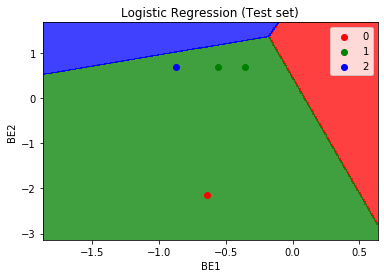

In [0]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('BE1')
plt.ylabel('BE2')
plt.legend()
plt.show()

Yep, removing the other features was a bad idea. But, the advantage of keeping only 2 features is that we can visualize the results of our model predictions. So, we successfully implemented Backward Elimination on our dataset, with a performance of 75%. And that marks the end of the notebook.

In the next, we will apply different types of classification models to our dataset, and see which model is a good predictor of the virality of the news/info websites.